# 1. Introduction/Business Problem

## Discussion of the business problem and the audience who would be interested in this project

With this project, I would like to bring your attention to a small beautifull town located in Bulgaria's coastline - Nessebar.
Nessebar is a favorite tourists spot when it comes to sun and culture on the Bulgarian Black Sea coast. With its UNESCO listed Old Town and some of the best coastline in the country Nessebar win hearts at first glance. Over 1 million tourists visit Nessebar every year.
When it comes to describing the sights of Nessebar, the majority of them are located in the old part of town, which is built on the beautiful picturesque island. Here simply everything is soaked in the atmosphere of tranquility and romance. All buildings of this part of the town were built during the Middle Ages. On the territory of the town are founded 40 ancient monasteries and churches, which were built mostly in the 5th – 6th centuries. On the border of the historic and new districts is an old windmill, which is considered one of the main symbols of Nessebar. In the Old Town, you can visit the Archaeological Museum containing priceless finds discovered by archaeologists during the city's exploration. Today, many of Nessebar's old churches are listed as UNESCO World Heritage sites. Another, no less interesting attraction for tourists is Action Aquapark some people consider it the best water park in all of Bulgaria, and all due to its excellent design and atmosphere.Nessebar has also preserved the ruins of the Byzantine baths, which are of great historical value.

Now lets see how many restaurants and hotels are located in Nessebar.

Here are the restaurants:

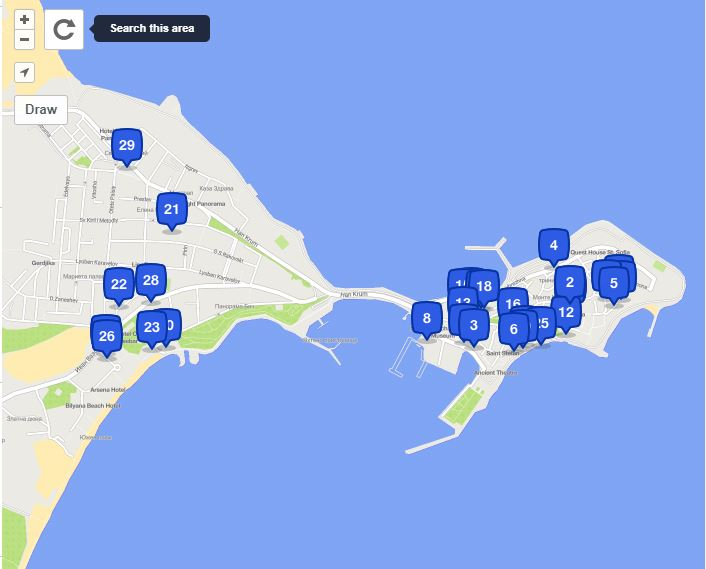

And the hotels:

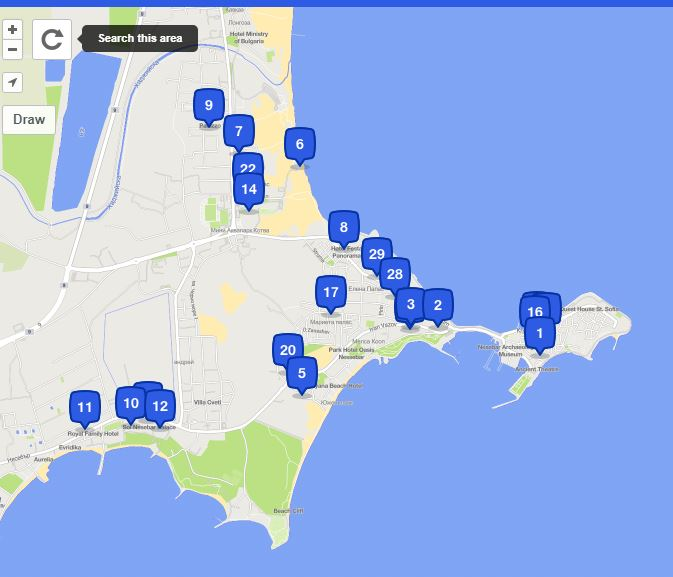

## Opening of Hotel/Restaurant

Coming down to business problem,I would like to address the stakeholders, interested in opening a Hotel or a Restaurant in this town. As we understand Nessebar is place with a great competition, especially, if you want to open a restaurant so I would like to help a possible stakeholder to understand better the town and the market with useful insights.

## Target audience

- A business entrepreneur that wants open a new restaurant/hotel in Nessebar.
- Someone curious about data that want to have an idea, how beneficial it is to open a restaurant and what are the pros and cons of this business.

## Data section

We will be completely working on Foursquare data to explore and try to find the best location for a new hotel where more venues like church, temples, beach, museums, memorials that are present nearby.
We will looking for midpoint area of venues to locate the new hotel.Before that our major focus will be on all venues present in and around the core place of Nessebar.